# Assignment


In [40]:
# Importing Libraries
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error

In [41]:
df = pd.read_csv('BostonHousing - BostonHousing.csv')

In [42]:
df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


# About the dataset

The Boston Housing Dataset

The Boston Housing Dataset is a derived from information collected by the U.S. Census Service concerning housing in the area of Boston MA. The following describes the dataset columns:

- CRIM - per capita crime rate by town
- ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS - proportion of non-retail business acres per town.
- CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
- NOX - nitric oxides concentration (parts per 10 million)
- RM - average number of rooms per dwelling
- AGE - proportion of owner-occupied units built prior to 1940
- DIS - weighted distances to five Boston employment centres
- RAD - index of accessibility to radial highways
- TAX - full-value property-tax rate per 10,000
- PTRATIO - pupil-teacher ratio by town
- B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
- LSTAT - % lower status of the population
- MEDV - Median value of owner-occupied homes in $1000's

# Question 
As always, we start off with EDA.

- Give me some insights, the better they are, the better your grade looks !!
- Then we move on to the modelling part

Using all of these variables, try to fit/train a linear regression model that predicts the price of the house. 

The ```MEDV``` is the price columns, it is in 1000's of $.

At the end, these are the things i am looking for:-
- Your model train and test RSME
- A python function that takes these values(training row for eg.) as input and predicts a price. 


That's all 

![](https://media.tenor.com/HyDkalWyz7YAAAAd/all-the-best-best-of-luck.gif)


# ---------------------------------------------------------------------------------------------------------------

# Exploratory Data Analysis (EDA)

In [43]:
df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [44]:
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


# Checking if there are NA values in the dataset

In [45]:
df.isna()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,False,False,False,False,False,False,False,False,False,False,False,False,False,False
502,False,False,False,False,False,False,False,False,False,False,False,False,False,False
503,False,False,False,False,False,False,False,False,False,False,False,False,False,False
504,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [46]:
(df.isna().sum())

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

## This shows that there are no NA values in the dataset. So now, we can proceed further.

# ---------------------------------------------------------------------------------------------------------------

C:\Users\aditi\AppData\Local\Temp\ipykernel_4364\497840695.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['medv'], bins=30)


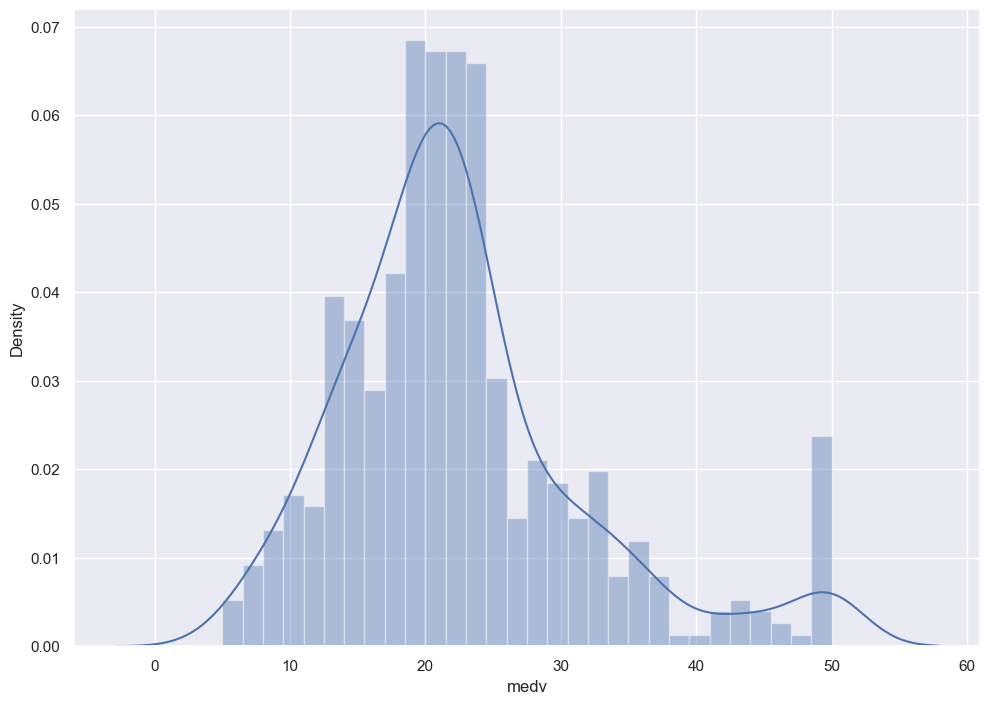

In [47]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(df['medv'], bins=30)
plt.show()

## The above graph shows that the price (medv) of the houses is normally distributed with a few outliers.

<Axes: >

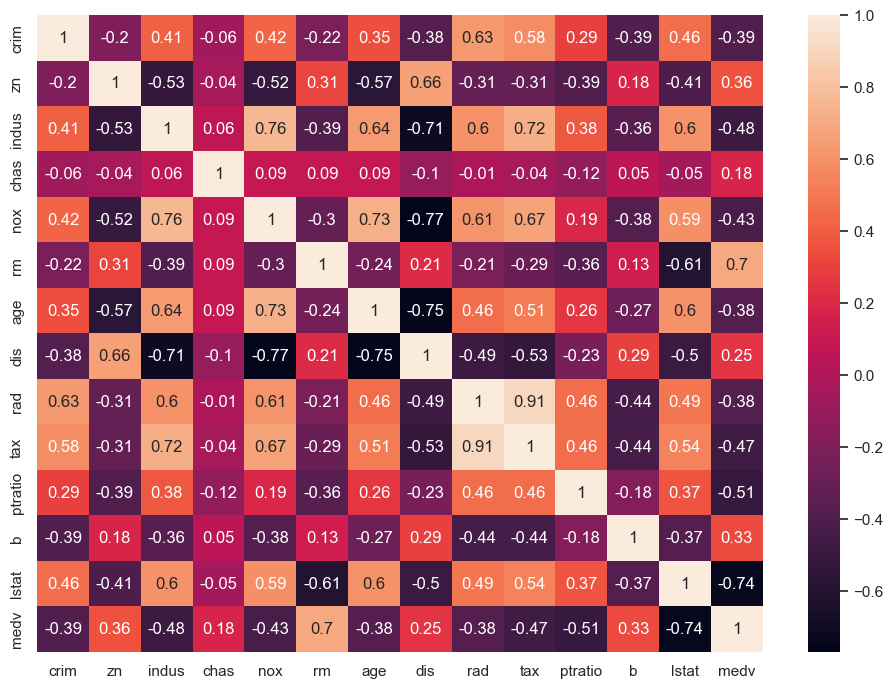

In [48]:
correlation_matrix = df.corr().round(2)
sns.heatmap(data = correlation_matrix, annot=True)

## By looking at the correlation matrix we can see that RM (average number of rooms per dwelling) has a strong positive correlation with MEDV(Median value of owner-occupied homes in $1000's) i.e 0.7 whereas LSTAT (% lower status of the population) has a high negative correlation with MEDV i.e -0.74.

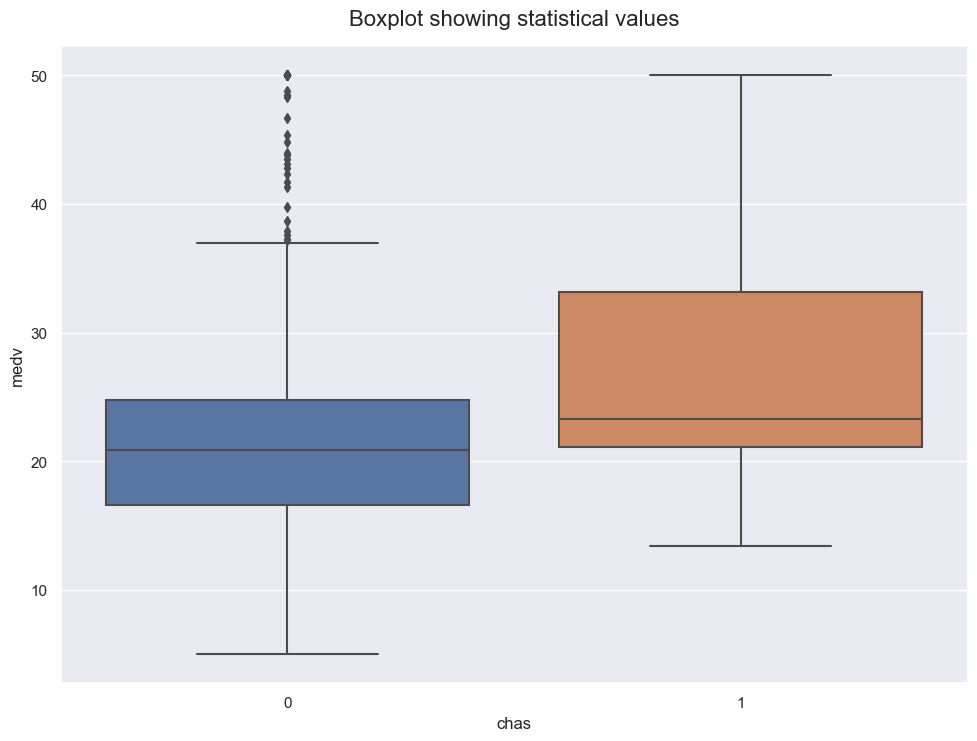

In [85]:
my_plot2 = sns.boxplot(x= "chas", y = "medv", data = df)
my_plot2.set_title("Boxplot showing statistical values", fontsize = 16, y = 1.02)
plt.show()

## We can observe that prices of houses closer to charles river are found to be higher in general with higher value of 1st quartile, median and 3rd quartile. Even the minimum and maximum values are higher if the house is located in close vicinity of charles river.

## Also, the number of outliers are found to be unusually high in cases where houses are located further away from charles river. This could possibly affect the predictability of pricing for properties away from charles river. 

In [61]:
rad = df['rad'].value_counts().head(10)

In [62]:
rad

24    132
5     115
4     110
3      38
6      26
2      24
8      24
1      20
7      17
Name: rad, dtype: int64

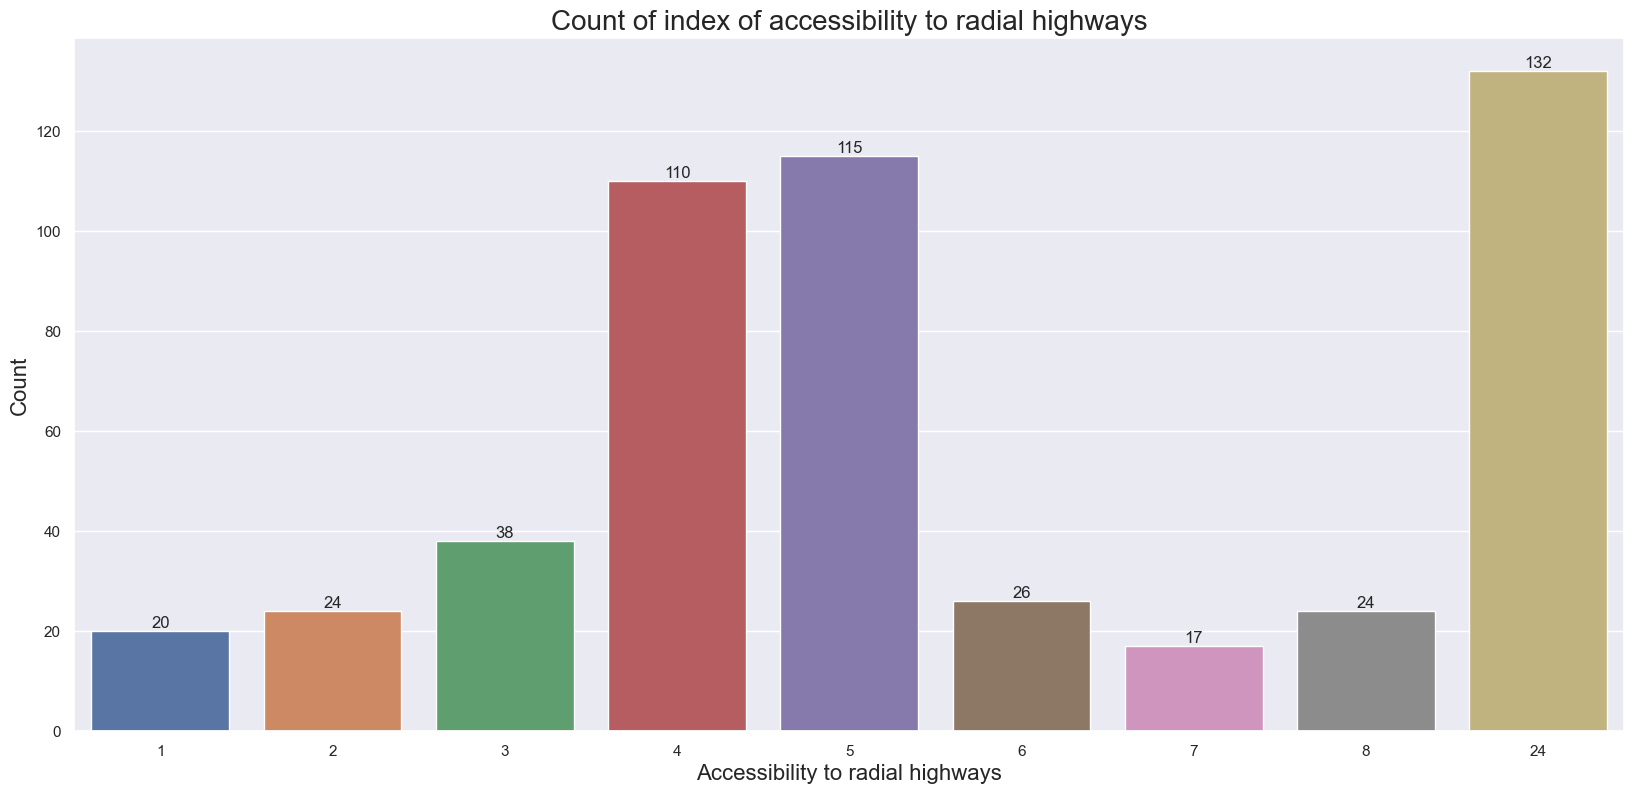

In [63]:
rad = df['rad'].value_counts().head(10)
plt.figure(figsize = (20, 9))
rad = sns.barplot(x=rad.index,y= rad,)
rad.set_xlabel(xlabel = 'Accessibility to radial highways', fontsize = 16)
rad.set_ylabel(ylabel = 'Count', fontsize = 16)
rad.set_title(label = 'Count of index of accessibility to radial highways', fontsize = 20)  
for i in rad.containers:
    rad.bar_label(i)

## The above graph shows that 24 is the most common index of accessibility to radial highways.

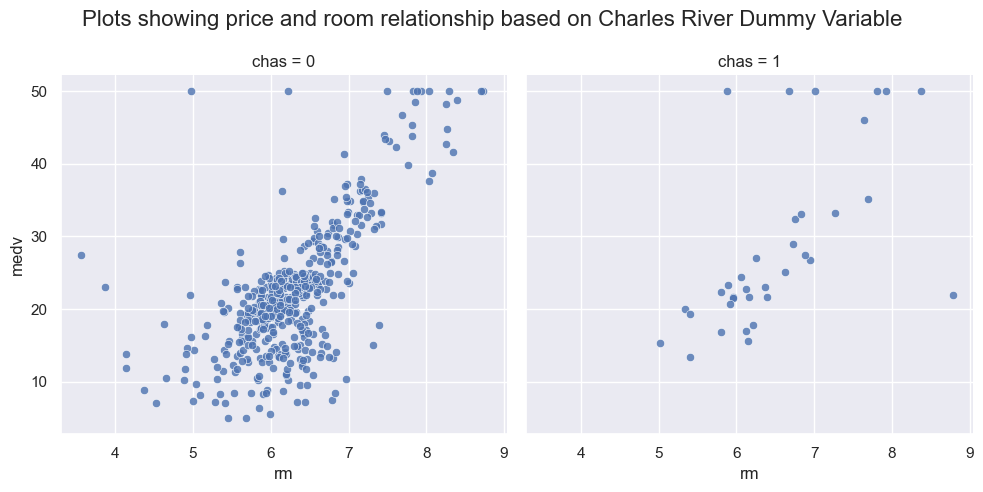

In [75]:
my_plot = sns.relplot(y = "medv", x = "rm", data = df, alpha = 0.8, col = "chas")
my_plot.fig.suptitle("Plots showing price and room relationship based on Charles River Dummy Variable", fontsize = 16)
my_plot.fig.subplots_adjust(top=0.85)
plt.show()

## Very few housing units are in close proximity to Charles River signifying lower house density.

## Whether in proximity of river or not, Price of the houses seems to increase in similar trend with increase in number of rooms.

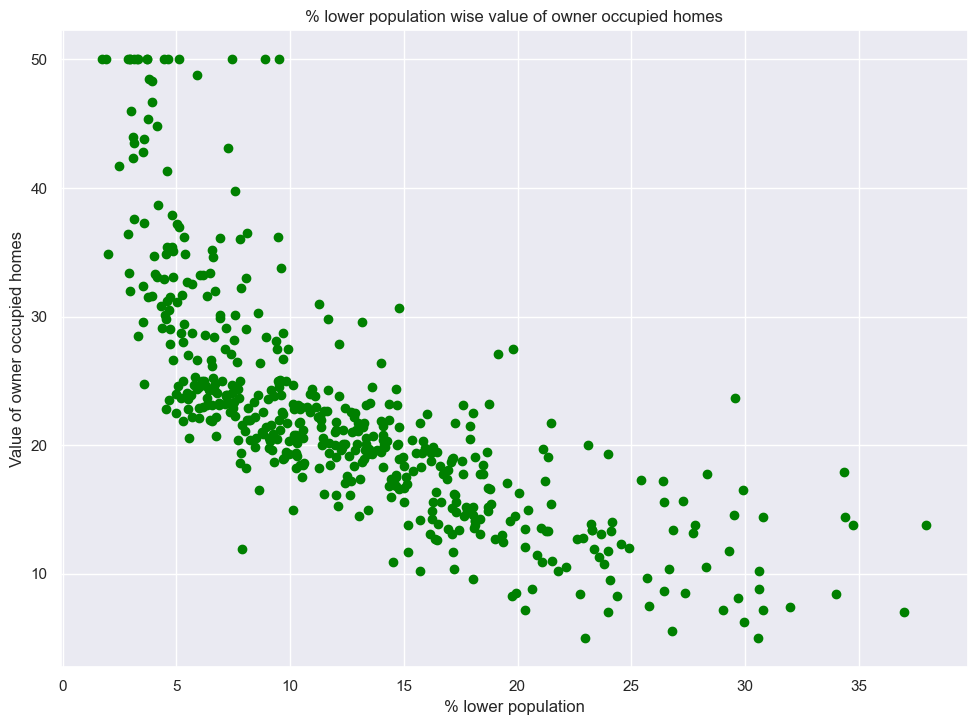

In [162]:
plt.scatter(df['lstat'],df['medv'],color='green')
plt.title('% lower population wise value of owner occupied homes')
plt.xlabel('% lower population')
plt.ylabel('Value of owner occupied homes')
plt.show()

# It can be infered that there is a negative correlation between the percentage of low status population and the number of owner pre occupied homes. It means that as the percentage from low status population increases, the value of owner occupied homes tend to decrease. This might be because of low income or lack of enough resources.

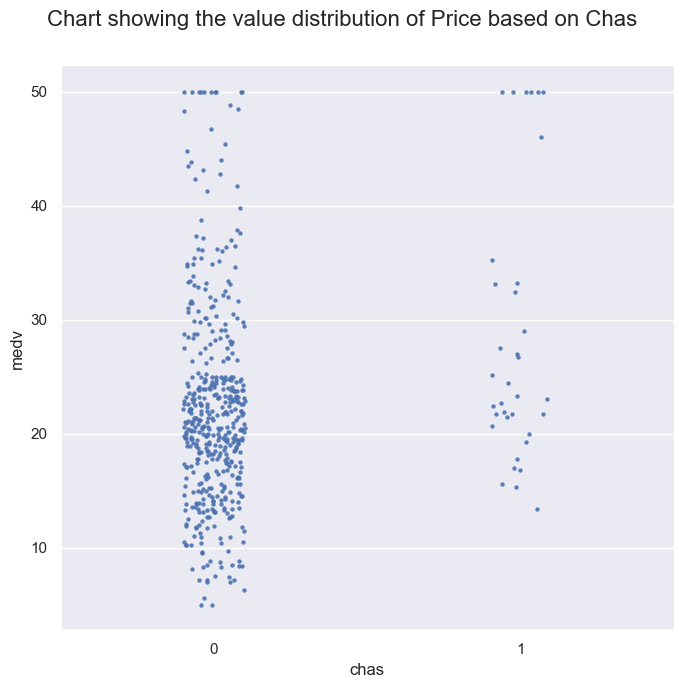

In [81]:
my_plot1 = sns.catplot(y = "medv", x = "chas", data = df, alpha = 0.9, s=10, height= 7)
my_plot1.fig.suptitle("Chart showing the value distribution of Price based on Chas", fontsize = 16)
my_plot1.fig.subplots_adjust(top=0.9)
plt.show()

## From the above plot, we can conclude that maximum spread of units further away from charles river is priced between 15-25 million USD. On the other hand, units in close proximity to charles river show maximum spread around 23 million USD mark.

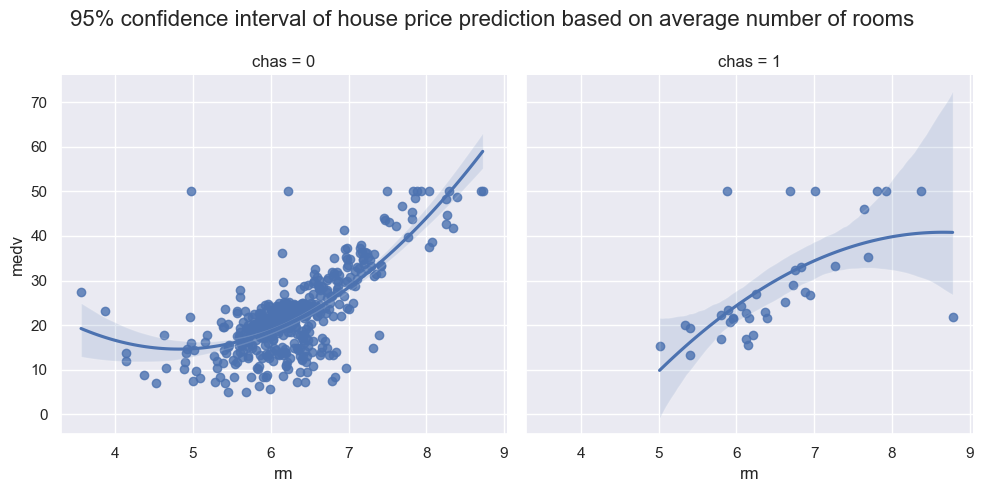

In [89]:
my_plot3 = sns.lmplot(x = "rm", y = "medv", data = df, col = "chas", order= 2)
my_plot3.fig.suptitle("95% confidence interval of house price prediction based on average number of rooms", fontsize = 16)
my_plot3.fig.subplots_adjust(top=0.85)
plt.show()

## The shaded area shows the prediction of prices of home based on average number of rooms in dwellings with a CI of 95%. 
## As per the above plot, the price prediction range of houses in the vicinity of charles river is much more spread out than as compared to the units further away from charles river.

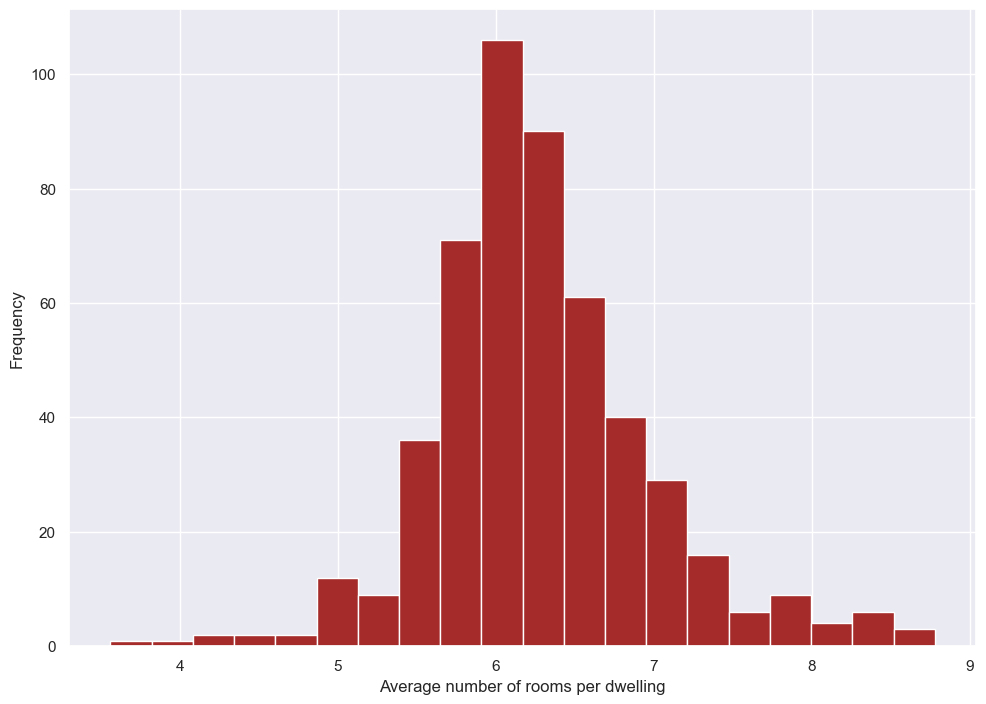

In [165]:
plt.hist(df['rm'], bins=20,color='brown')
plt.xlabel('Average number of rooms per dwelling')
plt.ylabel('Frequency')
plt.show()

# The histogram is somewhat bell-shaped, with a peak around 6 rooms per dwelling. The distribution indicates that there are more neighborhoods with fewer rooms per dwelling than with more rooms per dwelling.

# ---------------------------------------------------------------------------------------------------------------

# MODELLING

# Splitting data for Training and Testing

In [105]:
# Import train-test scikit learn
from sklearn.model_selection import train_test_split

In [108]:
df.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat', 'medv'],
      dtype='object')

In [109]:
x = df[['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat']]
y = df['medv']

In [112]:
# Spliting the data for train and test 
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.7,random_state=100)

In [113]:
print(len(x_train))
print(len(x_test))
print(len(y_train))
print(len(y_test))

354
152
354
152


# Fitting the Model

In [114]:
# Importing Linear Regression model from scikit learn
from sklearn.linear_model import LinearRegression

In [115]:
# Fitting the model
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [116]:
# Training prediction
y_train_pred = lr.predict(x_train)

In [117]:
# Testing prediction
y_test_pred = lr.predict(x_test)

# Calculating the accuracy of training and testing using R-square

## Training accuracy

In [141]:
rsq_train = r2_score(y_train_pred,y_train)

In [142]:
rsq_train

0.6717864580837181

In [143]:
mse_training = mean_squared_error(y_train_pred,y_train)

In [144]:
mse_training

19.06739115538505

## Testing Accuracy

In [145]:
rsq_test = r2_score(y_test_pred,y_test)

In [146]:
rsq_test

0.4360545819641538

In [147]:
mse_testing = mean_squared_error(y_test_pred,y_test)

In [148]:
mse_testing

29.79884430147879

# Conclusion

In [134]:
print('rsq of training :',rsq_train)
print('rsq of testing :',rsq_test)

rsq of training : 0.6717864580837181
rsq of testing : 0.4360545819641538


In [150]:
print('mse of training :',mse_training)
print('mse of testing :',mse_testing)

mse of training : 19.06739115538505
mse of testing : 29.79884430147879


# Python Function

In [167]:
def my_function(a,b,c,d,e,f,g,h,i,j,k,l,m):
    temp=[]
    temp.append(lr.predict([[a,b,c,d,e,f,g,h,i,j,k,l,m]]))
    return temp

In [169]:
my_function(0.00552,19.0,2.42,0,0.328,6.875,55.2,4.1900,1,276,14.3,496.90,4.94)

C:\Users\aditi\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



[array([35.89765096])]

According to the above input values of 'crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat' - The predicted medv(price) of the house is 35.89765096.